In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [121]:
pd.set_option('display.max_columns', 6)
pd.set_option('display.width', 300)
food = pd.read_csv('haemuk.csv')
food=food.iloc[:,1:]

food['영양소'].replace(' ', np.nan, inplace=True)
print(food.head(9))
food_=food.dropna(how='any')
food_=food_.reset_index()
print(food_.tail(4))
print(food_.loc[3964]['영양소'])

        요리이름                                                조리법                                                 재료                                                영양소                                                 태그
0     단호박 스프  '단호박은 껍질과 씨를 제거한 뒤 적당한 크기로 자른다.'  '샐러리  당근  양파...  '단호박'  '샐러리'  '당근'  '양파'  '샬롯'  '야채육수(혹은 물)'  ...                                                NaN   '겨울', '스튜/스프요리', '실생활 요리', '양식 요리', '채소류 요리',...
1      갈릭 난   "냉장고가 텅텅 비어있더라구요  그럼 이럴때 주부를 구해주는 효자 메뉴가 있죠 바로...  '강력분'  '물'  '파마산치즈'  '올리브유'  '설탕'  '이스트'  '소금'...   '칼로리 156.4kcal (23.5%)', '탄수화물 75.7g (22.9%)'...        '빵/케이크', '손님 접대 요리', '동남아/인도 요리', '가공식품 요리'
2       양배추롤  '가을도 왔고.. 이제는 겨울의 문턱. 야채 코너를 지날 때면 양배추를 눈여겨 보며...  '쇠고기'  '다진 양파'  '달걀'  '밥 (혹은 빵가루)'  '우유'  '넛맥'...   '칼로리 118.5kcal (17.8%)', '탄수화물 16.0g (4.8%)',...                    '쇠고기', '찜요리', '실생활 요리', '일식 요리'
3    태국식 홍합찜  '런던의 유명음식점 중에.. 벨고(: Belgo)라 불리는 벨기에식 홍합 요리 전문...  '홍합'  '청주'  '코리엔더'  '레몬그라스'  '파'  '마늘'  '코코넛 밀...   '칼로리 115.3kcal 

In [143]:
data = pd.read_csv('haemuk.csv')
# data
nutrient_data = data['영양소']
nutrient_data = data['영양소'].replace(' ', np.nan)
nutrient_data = nutrient_data.dropna()
nutrient_data = nutrient_data.reset_index(drop=True)
print(nutrient_data)

# nutrient_data
df = pd.DataFrame(columns=("칼로리","탄수화물","단백질", '지질', '나트륨', '콜레스테롤', '식이섬유', '칼슘', '비타민c', '당류','idx'))
num=0
for i in range(len(nutrient_data)):
  a = nutrient_data[i].split(',')
  
  # dict
  dic = {
      '칼로리': '',
      '탄수화물': '',
      '단백질': '',
      '지질': '',
      '나트륨': '',
      '콜레스테롤': '',
      '식이섬유': '',
      '칼슘': '',
      '비타민c': '',
      '당류': '',
      'idx' : num
  }

  for j in range(len(a)):
    b = a[j].split(' ')
    b[1] = b[1].replace('\'', '') # name
    b[3] = b[3].replace('(', '').replace(')', '').replace('\'','').replace('%', '')  # percent
    per=float(b[3])
    if per > 100:
      dic[b[1]] = 80
    else : 
      dic[b[1]] = per

  df = df.append(dic,ignore_index=True)
  num+=1
print(df)

0        '칼로리 156.4kcal (23.5%)', '탄수화물 75.7g (22.9%)'...
1        '칼로리 118.5kcal (17.8%)', '탄수화물 16.0g (4.8%)',...
2        '칼로리 115.3kcal (23.1%)', '탄수화물 20.7g (6.3%)',...
3        '칼로리 917.4kcal (183.5%)', '탄수화물 9.2g (2.8%)',...
4        '칼로리 293.4kcal (29.3%)', '탄수화물 7.1g (2.1%)', ...
                              ...                        
3962     '칼로리 2377.8kcal (118.9%)', '탄수화물 20.9g (6.3%)...
3963     '칼로리 1328.4kcal (66.4%)', '탄수화물 44.6g (13.5%)...
3964     '칼로리 526.8kcal (79.0%)', '탄수화물 151.3g (45.9%)...
3965     '칼로리 14.2kcal (2.8%)', '탄수화물 5.9g (1.8%)', '단...
3966     '칼로리 284.2kcal (28.4%)', '탄수화물 17.8g (5.4%)',...
Name: 영양소, Length: 3967, dtype: object
       칼로리  탄수화물   단백질    지질   나트륨  ...  식이섬유    칼슘  비타민c   당류   idx
0     23.5  22.9  29.4  18.3  32.2  ...  14.4  13.1   3.1          0
1     17.8   4.8  46.2  40.2  31.7  ...   3.1   6.4   7.4    0     1
2     23.1   6.3  49.6  60.1  44.5  ...  11.6  27.7  19.3          2
3     80.0   2.8    82  80.0  24.3  ...   5.6  

In [156]:
# inputs = ["칼로리","탄수화물","단백질", '지질', '나트륨', '콜레스테롤', '식이섬유', '칼슘', '비타민c', '당류']
inputs = ["탄수화물", '나트륨', '당류']


In [157]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 300)
df_=df.replace('', 0.0)
X = df_[inputs]

print(df_)
print(X)

       칼로리  탄수화물   단백질    지질   나트륨  ...  식이섬유    칼슘  비타민c   당류     idx
0     23.5  22.9  29.4  18.3  32.2  ...  14.4  13.1   3.1  0.0     0.0
1     17.8   4.8  46.2  40.2  31.7  ...   3.1   6.4   7.4  0.0     1.0
2     23.1   6.3  49.6  60.1  44.5  ...  11.6  27.7  19.3  0.0     2.0
3     80.0   2.8  82.0  80.0  24.3  ...   5.6  10.2  12.4  8.5     3.0
4     29.3   2.1  20.3  80.0  15.2  ...   8.4  32.3  12.6  0.0     4.0
...    ...   ...   ...   ...   ...  ...   ...   ...   ...  ...     ...
3962  80.0   6.3  80.0  80.0  58.3  ...   7.9  19.1  72.2  0.0  3962.0
3963  66.4  13.5  78.0  80.0  26.5  ...  74.5  20.1  80.0  0.3  3963.0
3964  79.0  45.9  80.0  80.0  80.0  ...  39.6  45.7  79.3  0.0  3964.0
3965   2.8   1.8   1.4   7.2  28.6  ...   0.4   0.9   3.2  0.0  3965.0
3966  28.4   5.4  29.0  54.1  60.9  ...  21.3   7.2  26.0  0.0  3966.0

[3967 rows x 11 columns]
      탄수화물   나트륨   당류
0     22.9  32.2  0.0
1      4.8  31.7  0.0
2      6.3  44.5  0.0
3      2.8  24.3  8.5
4      2.1  

In [158]:
# 평균이 0과 표준편차가 1이 되도록 변환.
X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)  

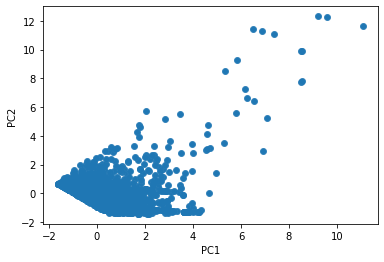

In [159]:
# 주성분 분석
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

ax = sns.scatterplot(x='PC1', y='PC2', data = principalDF) 
sns.regplot(x=principalDF['PC1'], y=principalDF['PC2'], fit_reg=False)

display()

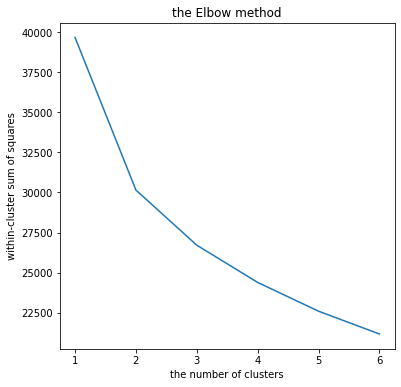

In [134]:
# 엘보우 기법 사용 적합한 군집 찾기
cluster_range = range(1,7)
cluster_errors = []
for n in cluster_range:
    cluster = KMeans(n)
    cluster.fit(X)
    cluster_errors.append(cluster.inertia_)

plt.figure(figsize = (6,6))
plt.plot(cluster_range, cluster_errors)
plt.title('the Elbow method')
plt.xlabel('the number of clusters')
plt.ylabel('within-cluster sum of squares')
display()

In [127]:
# 5개의 클러스터로 군집화 해보기
km = KMeans(n_clusters = 6)
km.fit(X)

centroids = km.cluster_centers_ 
labels= km.labels_
df_['label'] = labels

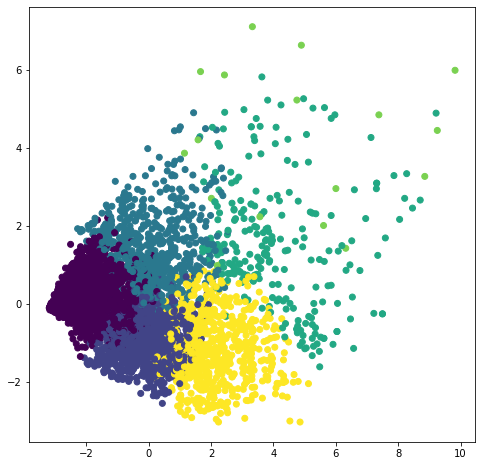

In [128]:
# 원래 데이터와 비교
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

plt.figure(figsize = (8,8))
plt.scatter('PC1', 'PC2', data = principalDF, c = labels)

display()

In [96]:
df_.groupby(['label'])['idx'].count()

label
0     844
1       1
2      92
3      17
4       1
5    3012
Name: idx, dtype: int64

In [100]:
df_[df_['label'] == 4]

,칼로리,탄수화물,단백질,지질,나트륨,...,칼슘,비타민c,당류,idx,label
2309,17.2,14.6,57.6,7.3,217.4,...,4028.3,6.8,0.0,2309.0,4


In [105]:
df_ = df_[df_['idx'] != 284]
df_ = df_[df_['idx'] != 2309]
df_.reset_index(drop = True, inplace = True)

X = df_[inputs]
print('X shape:', X.shape) 

X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)


X shape: (3965, 10)


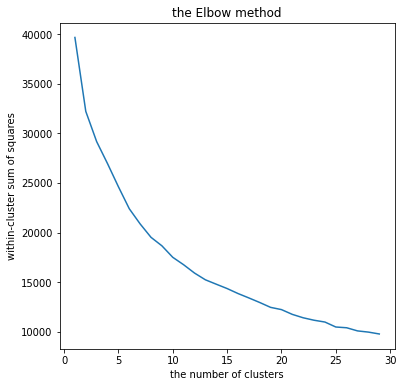

In [110]:
# 엘보우 기법 사용 적합한 군집 찾기
cluster_range = range(1,30)
cluster_errors = []
for n in cluster_range:
    cluster = KMeans(n)
    cluster.fit(X)
    cluster_errors.append(cluster.inertia_)

plt.figure(figsize = (6,6))
plt.plot(cluster_range, cluster_errors)
plt.title('the Elbow method')
plt.xlabel('the number of clusters')
plt.ylabel('within-cluster sum of squares')
display()

In [115]:

km = KMeans(n_clusters = 7)
km.fit(X)

centroids = km.cluster_centers_ 
labels= km.labels_
df_['label'] = labels

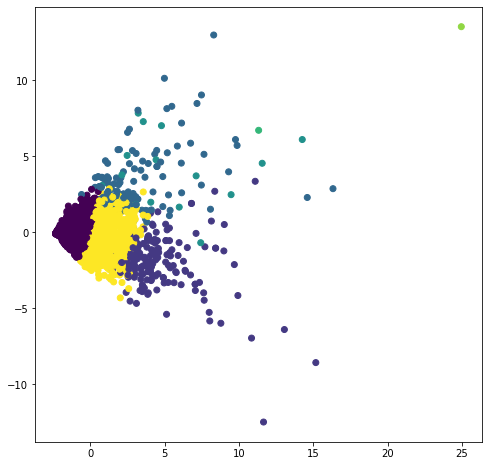

In [116]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

plt.figure(figsize = (8,8))
plt.scatter('PC1', 'PC2', data = principalDF, c = labels)

display()